# Assignment 2. Semi-open, Classification

## Frame the Problem


Predict which passengers on the titanic survived based on their age, gender number of siblings, etc.

The goal is to predict which passengers survived the Titanic shipwreck.

### Importing the basic libraries

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sb

## Importing the Data

In [214]:
data = pd.read_csv('Titanic_Data.csv')

In [215]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,No
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Yes
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Yes
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,No


## Cleaning the Data

Drop the irrelevant features.

In [216]:
data.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [217]:
data.head()

,Pclass,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,No
1,1,female,38.0,1,0,71.2833,C,Yes
2,3,female,26.0,0,0,7.9250,S,Yes
3,1,female,35.0,1,0,53.1000,S,Yes
4,3,male,35.0,0,0,8.0500,S,No


### Converting the Categorical Data to Numerical Data

In the dataset,  there are 3 columns with the catergorical values that need to be converted to numerical values. These are:

* Sex
* Embarked
* Survived

We will also check that the dataset is complete and there is no null cells.

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             891 non-null    int64  
 1   Sex                                891 non-null    object 
 2   Age                                714 non-null    float64
 3   Number of Siblings/Spouses Aboard  891 non-null    int64  
 4   Number of Parents/Children Aboard  891 non-null    int64  
 5   Fare                               891 non-null    float64
 6   Embarked                           889 non-null    object 
 7   Survived                           891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


Converting the values of the "purchased" column

In [219]:
# getting the unique values in the purchase column
data['Survived'].unique()

array(['No', 'Yes'], dtype=object)

In [220]:
# make the dictionary of the items in the "survived" column
survived = {"No": 0, "Yes": 1}
data["Survived"] = data["Survived"].map(survived)
data["Survived"].head()  # checking if the changes are applied

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Converting the values of the "sex" column

In [221]:
# getting the unique values in the sex column
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [222]:
# make the dictionary of the items in the "sex" column
gender = {"male":0.0, "female":1.0}
data['Sex'] = data['Sex'].map(gender)
data['Sex'].head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Sex, dtype: float64

Converting the values of the "embarked" column

In [223]:
# getting the unique values in the embarked column
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [224]:
# make the dictionary of the items in the "embarked" column
ports = {'S':0.0, 'C':1.0, 'Q':2.0}
data['Embarked'] = data['Embarked'].map(ports)
data['Embarked'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

Check the dataset to see if changes are applied.

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             891 non-null    int64  
 1   Sex                                891 non-null    float64
 2   Age                                714 non-null    float64
 3   Number of Siblings/Spouses Aboard  891 non-null    int64  
 4   Number of Parents/Children Aboard  891 non-null    int64  
 5   Fare                               891 non-null    float64
 6   Embarked                           889 non-null    float64
 7   Survived                           891 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


### Encoding the Output Data (Labels)

In [226]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Survived'] = le.fit_transform(data['Survived'])
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Exploring the Data

Here, we will check the correlation between "Survived" column and the other colunms.

You can find more info about the heatmap function in Seaborn [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Survived                             1.000000
Sex                                  0.543351
Fare                                 0.257307
Embarked                             0.108669
Number of Parents/Children Aboard    0.081629
Number of Siblings/Spouses Aboard   -0.035322
Age                                 -0.077221
Pclass                              -0.338481
Name: Survived, dtype: float64

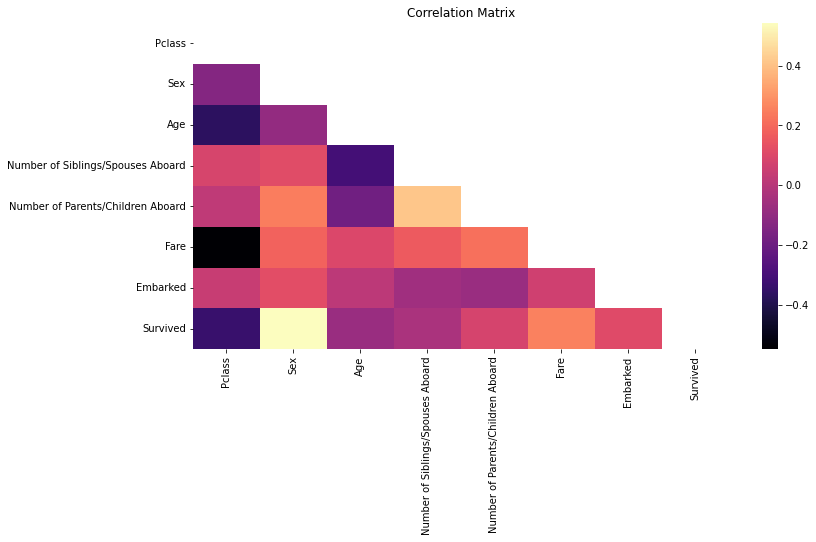

In [227]:
# creating the correlation matrix
corr_matrix = data.corr()

# visualizing the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
plt.figure(figsize=(12, 6))  # to set the figure size
heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
plt.title("Correlation Matrix")  # to add title 
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# getting the correlation values with the purchased column
## Start the code here
corr_matrix['Survived'].sort_values(ascending=False)
## End

### Data Visualization

In [228]:
# making a function to plot the data
def plot_scatter_with_labels(X1, X2, Y, xlabel='Age', ylabel='Fare'):
  df = pd.DataFrame(dict(x1=X1, x2=X2, label=Y))
  groups = df.groupby('label')
  for number, group in groups:
    if number == 0:
      name = 'Did not survived'
    elif number == 1:
      name = 'Survived'
    plt.plot(group.x1, group.x2, marker='o', linestyle='', ms=3, label=name)

  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)


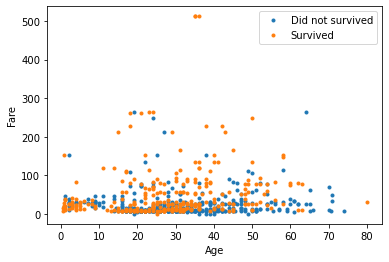

In [229]:
plot_scatter_with_labels(data['Age'], data['Fare'], data['Survived'])

## Data Pre-Processing

### Input and Output

In [230]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [231]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = my_imputer.fit_transform(X)

In [232]:
from sklearn.preprocessing import LabelEncoder
LaEnc = LabelEncoder()
y = LaEnc.fit_transform(y)

### Splitting the Train and Test Data

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20) #, random_state = 0

Let's check the type of the data 

In [234]:
print(type(X_train))
print(type(Y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Scaling the features

We standardize all the data using their mean and standard deviation

$$ \hat{x_i} = \frac{x_i-\mu}{\sigma_i}$$

In [235]:
print(type(X_train))

<class 'numpy.ndarray'>


Scale only age and fare.

In [236]:
scaler = StandardScaler()
X_train[:, [1,4]] = scaler.fit_transform(X_train[:, [1,4]])
print(type(X_train))

<class 'numpy.ndarray'>


### Taking care of the outliers in the numerical data

In [237]:
from sklearn.neighbors import LocalOutlierFactor
my_lof = LocalOutlierFactor(contamination=0.01)
y_hat = my_lof.fit_predict(X_train) #returns +1 for inliers and -1 for outliers
outlier_mask = (y_hat != -1)
print('Before Outlier removal: \nX.shape = ', X_train.shape, ' and y.shape = ', Y_train.shape)
X_train, Y_train = X_train[outlier_mask, :], Y_train[outlier_mask]
print('After Outlier removal: \nX.shape = ', X_train.shape, ' and y.shape = ', Y_train.shape)

Before Outlier removal: 
X.shape =  (712, 7)  and y.shape =  (712,)
After Outlier removal: 
X.shape =  (704, 7)  and y.shape =  (704,)


## Exploring Different Machine Learning Models

In [238]:
from sklearn.model_selection import cross_val_score
# importing the models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Converting the output to numpy array and changing the shape

In [239]:
Y_train = Y_train.ravel()

#### Discriminant Analysis Classifier

In [240]:
da_clf = LinearDiscriminantAnalysis()
da_clf.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [241]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(da_clf, X_train, Y_train, scoring='accuracy', cv=5)  # 5-fold
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores = {}
avg_cv_scores['DA'] = np.average(scores)

[0.84397163 0.82978723 0.83687943 0.78723404 0.72857143]
Averaged prediction accuracy =  0.805288753799392


#### Naive Bayes Classifier

In [242]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
scores = cross_val_score(nb_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['NB'] = np.average(scores)

[0.81560284 0.83687943 0.83687943 0.76595745 0.71428571]
Averaged prediction accuracy =  0.7939209726443769


#### K-Nearest Neighbors

In [243]:
knn_clf = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2) # change n_neighbors; boundary becomes smoother with increasing value of K
knn_clf.fit(X_train, Y_train)
scores = cross_val_score(knn_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['KNN'] = np.average(scores)

[0.69503546 0.75177305 0.77304965 0.69503546 0.72857143]
Averaged prediction accuracy =  0.7286930091185411


#### Linear SVM

In [244]:
svmln_clf = SVC(kernel='linear')
svmln_clf.fit(X_train, Y_train)
scores = cross_val_score(svmln_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-linear'] = np.average(scores)

[0.80141844 0.80851064 0.80851064 0.78014184 0.74285714]
Averaged prediction accuracy =  0.7882877406281661


#### Nonlinear SVM (Gaussian Kernel)

In [245]:
svmrbf_clf = SVC(kernel='rbf')
svmrbf_clf.fit(X_train, Y_train)
scores = cross_val_score(svmrbf_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-nonlinear'] = np.average(scores)

[0.63829787 0.65957447 0.68794326 0.66666667 0.67857143]
Averaged prediction accuracy =  0.6662107396149949


#### Decision Tree

In [246]:
tree_clf = DecisionTreeClassifier(max_depth=3) # Play with hyperparameter
tree_clf.fit(X_train, Y_train)
scores = cross_val_score(tree_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Decision Tree'] = np.average(scores)

[0.83687943 0.85106383 0.86524823 0.78723404 0.77857143]
Averaged prediction accuracy =  0.8237993920972645


#### Random Forest

In [247]:
forest_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest_clf.fit(X_train, Y_train)
scores = cross_val_score(forest_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Random Forest'] = np.average(scores)

[0.82269504 0.78723404 0.82269504 0.81560284 0.77857143]
Averaged prediction accuracy =  0.8053596757852077


In [248]:
sorted_scores = sorted(avg_cv_scores.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('Decision Tree', 0.8237993920972645),
 ('Random Forest', 0.8053596757852077),
 ('DA', 0.805288753799392),
 ('NB', 0.7939209726443769),
 ('SVM-linear', 0.7882877406281661),
 ('KNN', 0.7286930091185411),
 ('SVM-nonlinear', 0.6662107396149949)]

### Using the Models to Predict the Testset

In [249]:
test_data.head()

,Pclass,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked,Survived
678,3,1.0,43.000000,1,6,46.900,0.0,0
363,3,0.0,35.000000,0,0,7.050,0.0,0
244,3,0.0,30.000000,0,0,7.225,1.0,0
507,1,0.0,29.699118,0,0,26.550,0.0,1
792,3,1.0,29.699118,8,2,69.550,0.0,0


In [250]:
# splitting the input and the output from the training set
Y_test = test_data[['Survived']].copy()

# removing the useless features and the output from the dataset
X_test = test_data.drop(['Survived', 'Embarked', 'Pclass'], axis=1) 

In [251]:
X_test = X_test.to_numpy()
X_test[:, [1,4]] = scaler.transform(X_test[:, [1,4]])
print(type(X_test))

<class 'numpy.ndarray'>


In [252]:
Y_test = Y_test.to_numpy()
Y_test = Y_test.ravel()

Using the trained models to do prediction on the test set.

In [253]:
test_pred_score = {}

In [254]:
from sklearn.metrics import confusion_matrix

#### Discriminant Analysis Classifier

In [255]:
# Discriminant Analysis Classifier
Y_test_pred_da = da_clf.predict(X_test)
test_pred_score['DA'] = accuracy_score(Y_test, Y_test_pred_da)
cm = confusion_matrix(Y_test, Y_test_pred_da)
print("Confusion matrix for Discriminant Analysis Classifier")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_da)*100, "%")

ValueError: X has 5 features per sample; expecting 7

#### Naive Bayes

In [ ]:
# Naive Bayes Classifier
Y_test_pred_nb = nb_clf.predict(X_test)
test_pred_score['NB'] = accuracy_score(Y_test, Y_test_pred_nb)
cm = confusion_matrix(Y_test, Y_test_pred_nb)
print("Confusion matrix for # Naive Bayes Classifier")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_nb)*100, "%")

Confusion matrix for # Naive Bayes Classifier
[[94 15]
 [22 48]]
Your Model Accuracy is= 79.3296089385475 %


#### KNN

In [ ]:
# K-Nearst Neighbors
Y_test_pred_knn = knn_clf.predict(X_test)
test_pred_score['KNN'] = accuracy_score(Y_test, Y_test_pred_knn)
cm = confusion_matrix(Y_test, Y_test_pred_knn)
print("Confusion matrix for KNN")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_nb)*100, "%")

Confusion matrix for KNN
[[94 15]
 [21 49]]
Your Model Accuracy is= 79.3296089385475 %


#### Linear SVM

In [ ]:
# Linear SVM
Y_test_pred_svmln = svmln_clf.predict(X_test)
test_pred_score['SVM_Linear'] = accuracy_score(Y_test, Y_test_pred_svmln)
cm = confusion_matrix(Y_test, Y_test_pred_svmln)
print("Confusion matrix for Linear SVM")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_svmln)*100, "%")

Confusion matrix for Linear SVM
[[94 15]
 [24 46]]
Your Model Accuracy is= 78.2122905027933 %


#### Nonlinear SVM (Gaussian Kernel)


In [ ]:
# Nonlinear SVM (Gaussian Kernel)
Y_test_pred_svmrbf = svmrbf_clf.predict(X_test)
test_pred_score['SVM_nonlinear'] = accuracy_score(Y_test, Y_test_pred_svmrbf)
cm = confusion_matrix(Y_test, Y_test_pred_svmrbf)
print("Confusion matrix for Gaussian Kernel")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_svmrbf)*100, "%")

Confusion matrix for Gaussian Kernel
[[98 11]
 [19 51]]
Your Model Accuracy is= 83.24022346368714 %


#### Decision Tree

In [ ]:
# Decision Tree
Y_test_pred_tree_clf = tree_clf.predict(X_test)
test_pred_score['Decision Tree'] = accuracy_score(Y_test, Y_test_pred_tree_clf)
cm = confusion_matrix(Y_test, Y_test_pred_tree_clf)
print("Confusion matrix for Decision Tree")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_tree_clf)*100, "%")

Confusion matrix for Decision Tree
[[97 12]
 [23 47]]
Your Model Accuracy is= 80.44692737430168 %


#### Random Forest

In [ ]:
# Random Forest
Y_test_pred_forest_clf = forest_clf.predict(X_test)
test_pred_score['Random Forest'] = accuracy_score(Y_test, Y_test_pred_forest_clf)
cm = confusion_matrix(Y_test, Y_test_pred_forest_clf)
print("Confusion matrix for Decision Tree")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_forest_clf)*100, "%")

Confusion matrix for Decision Tree
[[93 16]
 [16 54]]
Your Model Accuracy is= 82.12290502793296 %


#### Results

In [ ]:
sorted_scores = sorted(test_pred_score.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('SVM_nonlinear', 0.8324022346368715),
 ('Random Forest', 0.8212290502793296),
 ('Decision Tree', 0.8044692737430168),
 ('KNN', 0.7988826815642458),
 ('NB', 0.7932960893854749),
 ('DA', 0.7877094972067039),
 ('SVM_Linear', 0.7821229050279329)]

We tried 7 different Models:
* Discriminant Analysis Classifier
* Naive Bayes Classifier
* K-Nearest Neighbors
* Linear SVM
* Non-Linear SVM (Gaussian Kernal)
* Decision Tree
* Random Forest

Based on the results, Decision Tree is consistently the best model to predict the survivors on the Titanic.
